In [1]:
import os
import datetime as dt
import pandas as pd
import csv

### Importing Project Libraries

In [2]:
# add the 'src' directory as one where we can import modules
import sys
import pathlib # __file__ isn't recognized in Jupyter, so we need this to get the root path
path = pathlib.Path.cwd()
PROJ_ROOT = path.parent 
src_dir = str(PROJ_ROOT / 'src')
PROJ_ROOT = str(PROJ_ROOT)
sys.path.append(src_dir)
from data import make_dataset

### Confirm that the core data is up to date

In [3]:
usernames = ['emily', '+vinny']
today = dt.date.today()
usernames = make_dataset.refresh_user_data(usernames, PROJ_ROOT, today)
# print(usernames)
# Re-pulls raw data and refreshes basic interim data files: users_df.pkl 
# and a bunch for each user: filename + username + '.pkl'
#   contacts_df_, day_comm_log_df_, week_comm_log_df_
#   locations_df_, loc_log_df_, day_loc_log_df_, week_loc_log_df_

Interim users_df datafile exists
Data is up to date!


#### Set Interested Date Indices

In [4]:
date_indices = pd.date_range(today - dt.timedelta(35), today + dt.timedelta(0), freq='W-MON')

### Establish interim data path, open some data files

In [5]:
interim_data_path = os.path.join(PROJ_ROOT,
								"data",
								"interim")
users_df = pd.read_pickle(os.path.join(interim_data_path, 'users_df.pkl'))

raw_data_path = os.path.join(PROJ_ROOT,
                             "data",
                             "raw")
raw_users_df = pd.read_pickle(os.path.join(raw_data_path, 'users_df.pkl'))

# raw_users_df #.head(20)
users_df.head(20)


,date_created,refresh_time,userId,unrated_threshold,risky_threshold,supportive_threshold
username,,,,,,
vinoct24,2018-10-24,2018-11-15,5bd0a014dc3f590016b44f5a,0.0,1.0,3.0
emily,2018-06-15,2018-11-16,5b23b05adfd99a00113eefd9,0.0,1.0,3.0
emily2,2018-10-04,2018-11-15,5bb6117dfb7a9a001057d1fd,0.0,1.0,3.0
liamkl,2018-09-19,2018-11-15,5ba244e1a56d2d001a1a9281,0.0,1.0,3.0
vinoct31,2018-10-31,2018-11-15,5bd9b006bf92300016081351,0.0,1.0,3.0
zombeck,2018-10-03,2018-11-15,5bb4aa17febc7c0010d8f234,0.0,1.0,3.0
username,2018-11-12,2018-11-16,5be9ee601dc2970010696d8c,0.0,1.0,3.0
+vinny,2018-11-14,2018-11-16,5bec3a6b1dc2970010696def,0.0,1.0,3.0


#### Pulling communication, location data into user dictionaries

In [6]:
weekly_comm_dict = {}
contacts_dict = {}

weekly_loc_log_dict = {}
locations_dict = {}

for username in usernames:
    interim_comm_data_file_path = os.path.join(interim_data_path, 'week_comm_log_df_' + username + '.pkl')
    weekly_comm_df = pd.read_pickle(interim_comm_data_file_path)
    weekly_comm_dict[username] = weekly_comm_df
    
    interim_contact_data_file_path = os.path.join(interim_data_path, 'contacts_df_' + username + '.pkl')
    contacts_df = pd.read_pickle(interim_contact_data_file_path)
    contacts_dict[username] = contacts_df
    
    interim_loc_data_file_path = os.path.join(interim_data_path, 'week_loc_log_df_' + username + '.pkl')
    weekly_loc_log_df = pd.read_pickle(interim_loc_data_file_path)
    weekly_loc_log_dict[username] = weekly_loc_log_df
    
    locations_data_file_path = os.path.join(interim_data_path, 'locations_df_' + username + '.pkl')
    locations_df = pd.read_pickle(locations_data_file_path)
    locations_dict[username] = locations_df

In [7]:
weekly_loc_log_dict['+vinny'].columns

Index(['safe_loc_visits', 'risky_loc_visits', 'total_loc_visits',
       'days_w_safe_loc_visits', 'days_w_risky_loc_visits',
       'days_w_total_loc_visits', 'high_risky_loc_visits_day',
       'high_total_loc_visits_day', 'change_in_risky_loc_visits',
       'change_in_days_w_risky_loc_visits'],
      dtype='object')

#### Pulling notifictaion dict

In [8]:
notification_dict = make_dataset.make_notification_data(users_df, usernames, PROJ_ROOT)

Username not found: []
5b23b05adfd99a00113eefd9
                             timestamp                   type  \
_id                                                             
5be871f20eb5fd0010495da5  1.541960e+12       sent-sms-warning   
5be87a791dc2970010696d5e  1.541962e+12  outgoing-call-warning   
5be88b780eb5fd0010495daa  1.541967e+12       geofence-warning   
5be893ff0eb5fd0010495dab  1.541969e+12       geofence-warning   
5be89b470eb5fd0010495daf  1.541971e+12       geofence-warning   

                                            userId  
_id                                                 
5be871f20eb5fd0010495da5  5b23b05adfd99a00113eefd9  
5be87a791dc2970010696d5e  5b23b05adfd99a00113eefd9  
5be88b780eb5fd0010495daa  5b23b05adfd99a00113eefd9  
5be893ff0eb5fd0010495dab  5b23b05adfd99a00113eefd9  
5be89b470eb5fd0010495daf  5b23b05adfd99a00113eefd9  
5bec3a6b1dc2970010696def
                             timestamp                 type  \
_id                                  

## Plotting

In [9]:
from visualization import generate_report_charts

chart_path = os.path.join(PROJ_ROOT,
							"notebooks",
							"figures")

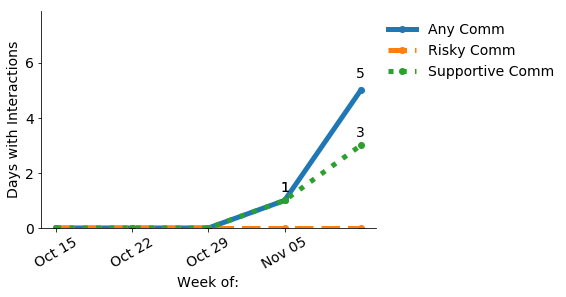

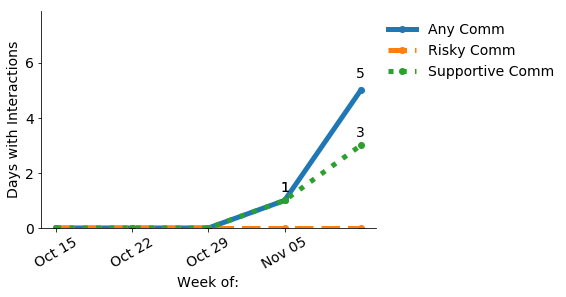

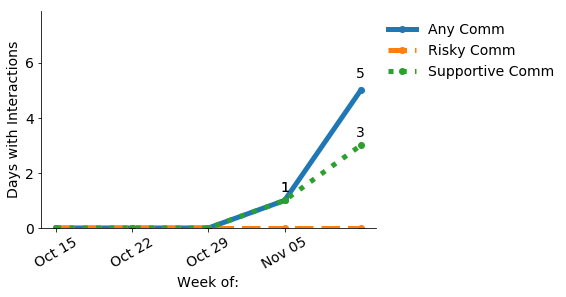

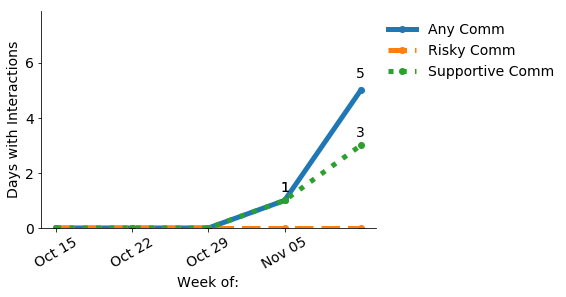

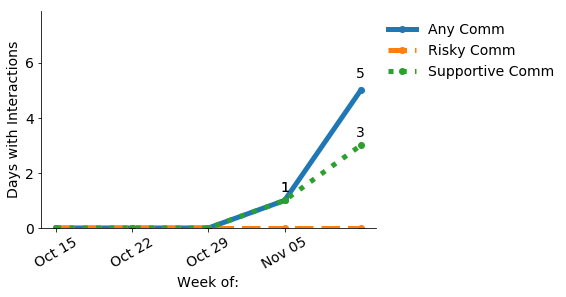

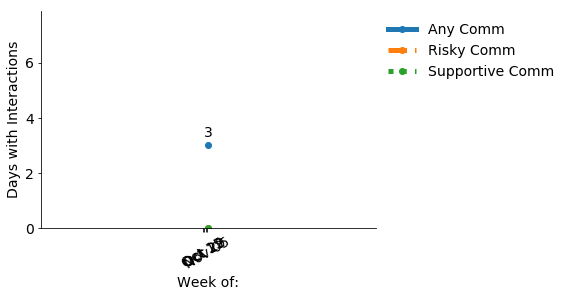

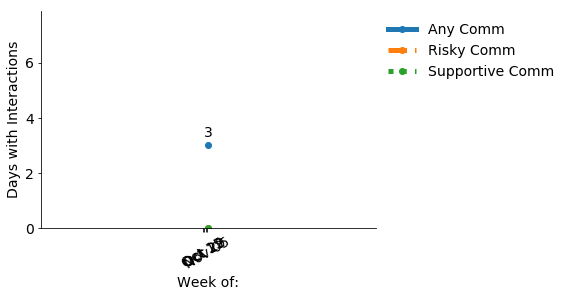

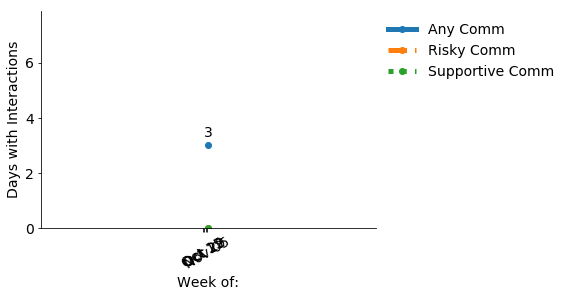

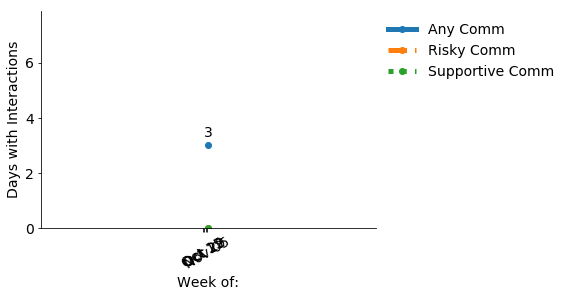

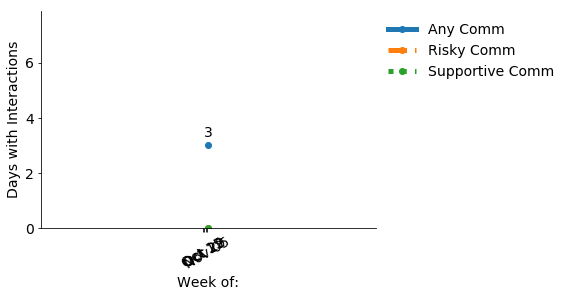

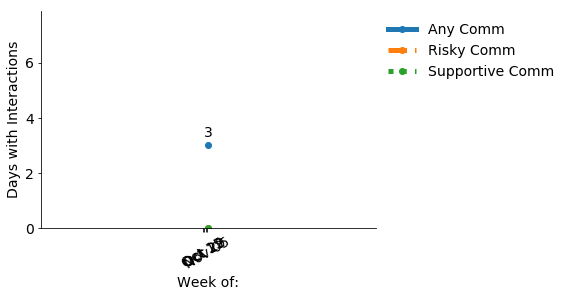

In [10]:
comm_days_line_chart_cols = ['total_comm_days', 'risky_comm_days', 'supportive_comm_days']

for username in usernames:
    comm_days_line_chart_data = weekly_comm_dict[username][comm_days_line_chart_cols]
    comm_days_line_chart_data = comm_days_line_chart_data[comm_days_line_chart_data.index >= date_indices[0]]
    generate_report_charts.comm_days_line_chart(username, date_indices, comm_days_line_chart_data, chart_path)

Jupyter Notebook


ValueError: shape mismatch: objects cannot be broadcast to a single shape

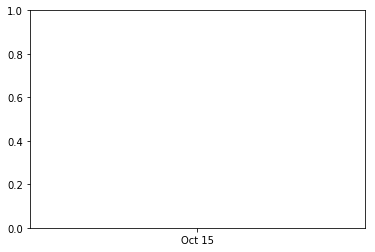

In [11]:
comm_vol_bar_chart_cols = ['total_comm', 'risky_comm', 'neutral_comm', 'supportive_comm', 'unrated_comm']

for username in usernames:
    comm_vol_bar_chart_data = weekly_comm_dict[username][comm_vol_bar_chart_cols]
    comm_vol_bar_chart_data = comm_vol_bar_chart_data[comm_vol_bar_chart_data.index >= date_indices[0]]
    generate_report_charts.comm_vol_bar_chart(username, date_indices, comm_vol_bar_chart_data, chart_path)

    
    

In [ ]:
comm_pie_chart_cols = ['risky_percent', 'neutral_percent', 'supportive_percent', 'unrated_percent']

comm_days_line_chart_cols = ['total_comm_days', 'risky_comm_days', 'supportive_comm_days']



loc_days_bar_chart_cols = ['days_w_risky_loc_visits']